In [1]:
import os, sys, shutil
from datetime import *
from PIL import Image, ImageDraw, ImageFont
from operator import itemgetter
import numpy as np
from os import environ

In [38]:
dataset_training_path= "/media/Gui2/thermix/ARTraining/trained_models/thermix_40a/thermix_40a_files.txt"

with open(dataset_training_path, "r") as f:
    training_lines = f.readlines()

training_set = {}
for line in training_lines:
    category, fil = line.split()
    
    if training_set.get(category):
        training_set[category].append(fil)
    else:
        training_set[category] = [fil]

In [39]:
high_precision_start = datetime.strptime("2016-07-28 19:44:15","%Y-%m-%d %H:%M:%S")

frames_background = []
for category in training_set.keys():
    count = 0
    old_camera_count = 0
    for frame in training_set[category]:
        name_of_video = os.path.basename(os.path.dirname(frame))

        # str_date_of_video = 2016-06-20T18%3A46%3A22
        str_date_of_video = "T".join(os.path.splitext(name_of_video)[0].split("_")[-2:])

        # date_of_video = datetime(2016-06-20 18:46:22)
        date_of_video = datetime.strptime(str_date_of_video,"%Y-%m-%dT%H%%3A%M%%3A%S")

        #convert to argentinian date
        date_of_video -= timedelta(hours=3)

        if "black5" in name_of_video:
            old_camera_count +=1
                
        if date_of_video >= high_precision_start:
            count += 1
                
            if category == "5":
                frames_background.append(frame)
    print "category %s: %d / %d (old: %d)" % (category, count, len(training_set[category]), old_camera_count)
            

category 1: 1062 / 6711 (old: 336)
category 3: 639 / 5055 (old: 144)
category 2: 792 / 5154 (old: 0)
category 5: 684 / 6825 (old: 93)
category 4: 411 / 6825 (old: 153)


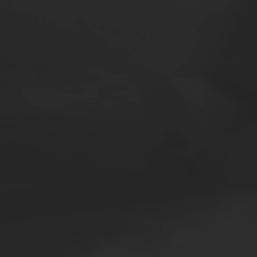

In [30]:
img = Image.open(os.path.join("/media/Gui2/thermix/dataset_merged",frames_background[10]))
img